# Homework 7: 

**DUE:** 5pm EST, April 30, 2020

### **Conceptual:** Short answer questions. Be concise

---

1. Suppose we produce ten bootstrapped samples from a data set containing red and green classes. We then apply a classification tree to each bootstrapped sample and, for a specific value of X, produce 10 estimates of P(Class is Red|X): 0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, and 0.75.

There are two common ways to combine these results together into a single class prediction. One is the majority vote approach discussed in class and the _ILSR_ Chapter 8. The second approach is to classify based on the average probability. What is the final classification under each of these two approaches? What does the difference in classification aggregation (if any) tell us about tree approaches?

**Answer:**

- Majority vote: red. There are 6 votes having P(Class is Red|X)> 0.5. They are the majority 
- Average: green. After averaging out: (0.1+0.15+0.2+0.2+0.55+0.6+0.6+0.65+0.7+0.75)/10 = 0.45; P(Class is Red|X)< 0.5. 

It is very difficult to interpret what the tree approaches is telling us when we use the bagging method. Because now the classification can be changed as we change the way we aggregate. 

---
2. Explain why out of bag (OOB) error provides a more reliable estimate of model test error than a more traditional hold out test set approach. 

**Answer:**
OOB error is better because the complete dataset is invovled in both constructing the decision tree and in estimating the error without violating the boundary between the training and the testing set. In contrast, traditional hold out set always have a subset of dataset as training and another subset of dataset as testing. The model trained that way is likely to have more vairance. 

---

### **Applied:** Show your code & plots

We will use the HCP dataset for these problems. Include conceptual answers to questions as comments in code cells. You should use the tidyverse and class libraries for this assignment, as well as the data table for the HCP data set.

You will need to have the "tidyverse", "tree" and "randomForest" packages installed to answer these problems.


In [4]:
library(tidyverse)
library(tree)
library(randomForest)

3. Use trees methods to predict unadjusted Flanker task (Flanker_Unadj) performance using a set of demographic, neural, and other cognitive factors. 


(a) Start by loading the HCP data and get a cleaned and tidy data table containing only Gender, Age, Flanker_Unadj, FS_Tot_WM_Vol, FS_Total_GM_Vol, WM_Task_Acc, ReadEng_Unadj, Language_Task_Acc, Dexterity_Unadj, PosAffect_Unadj, Relational_Task_Acc as our variables of interest.

In [6]:
# -------------------------------
# Question 3
# -------------------------------

# (a)

data <- read.csv("/Users/caoanjie/Desktop/Spring2020/DS/_DSPN_S20/hw7/unrestricted_trimmed_1_7_2020_10_50_44.csv")  %>% select(Gender, Age, Flanker_Unadj, FS_Tot_WM_Vol, FS_Total_GM_Vol, WM_Task_Acc, ReadEng_Unadj, Language_Task_Acc, Dexterity_Unadj, PosAffect_Unadj,Relational_Task_Acc)

data



Gender,Age,Flanker_Unadj,FS_Tot_WM_Vol,FS_Total_GM_Vol,WM_Task_Acc,ReadEng_Unadj,Language_Task_Acc,Dexterity_Unadj,PosAffect_Unadj,Relational_Task_Acc
M,22-25,121.97,NA,NA,NA,109.9589,NA,96.14,36.2,NA
M,26-30,130.42,543134,807245,91.596,113.5460,96.875,106.61,48.4,73.750
F,26-30,112.56,407292,664124,85.425,111.0700,80.417,118.68,46.2,96.250
M,31-35,121.18,500417,726206,91.138,131.8100,97.222,117.48,48.4,80.417
M,26-30,126.53,512946,762308,96.867,141.3166,100.000,121.55,55.1,96.667
F,31-35,101.85,429449,579632,73.017,113.5374,83.611,106.53,42.0,53.333
M,22-25,107.04,416995,665024,84.937,119.2434,82.917,98.19,59.2,54.167
F,31-35,94.96,NA,NA,NA,106.3450,NA,116.44,42.0,NA
M,26-30,113.67,491221,707674,91.542,106.9173,91.667,109.40,52.8,60.000
M,26-30,108.46,502143,773472,88.587,113.5714,81.250,99.42,50.2,82.083


(b) Fit a regression tree model with Flanker_Unadj as the response variable and all others as predictor variables. Prune your tree to find the best model fit using as few terminal nodes as possible and show that the model fit improves after pruning. Plot your tree, plot tree size versues model deviance, determine the test accuracy on a hold out test set, and show a pruned model performance.



Regression tree:
tree(formula = Flanker_Unadj ~ ., data = data, subset = train)
Variables actually used in tree construction:
[1] "WM_Task_Acc"         "ReadEng_Unadj"       "FS_Tot_WM_Vol"      
[4] "PosAffect_Unadj"     "Age"                 "Relational_Task_Acc"
[7] "Dexterity_Unadj"     "FS_Total_GM_Vol"     "Language_Task_Acc"  
Number of terminal nodes:  15 
Residual mean deviance:  73.95 = 36750 / 497 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-24.7000  -5.1960   0.3957   0.0000   5.1830  35.1100 

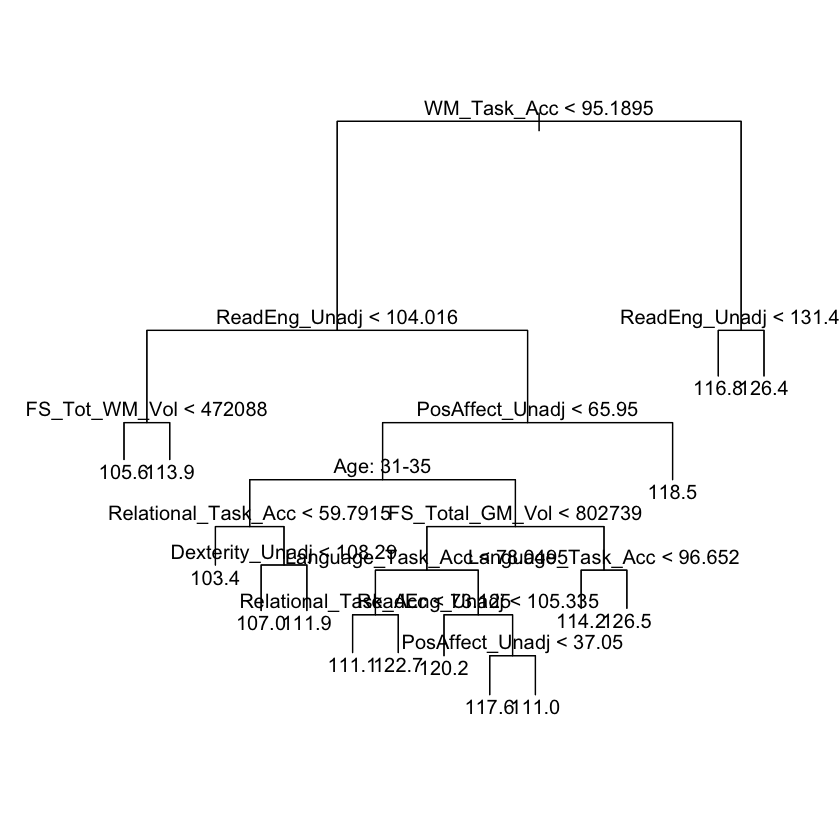

In [8]:
# (b)

#Train Tree
train = sample(1: nrow(data), nrow(data)/2) #create the training set
tree.reg=tree(Flanker_Unadj~.,data, subset=train) #fit the regression tree
summary(tree.reg) #summarize
plot(tree.reg)
text(tree.reg, pretty=0)


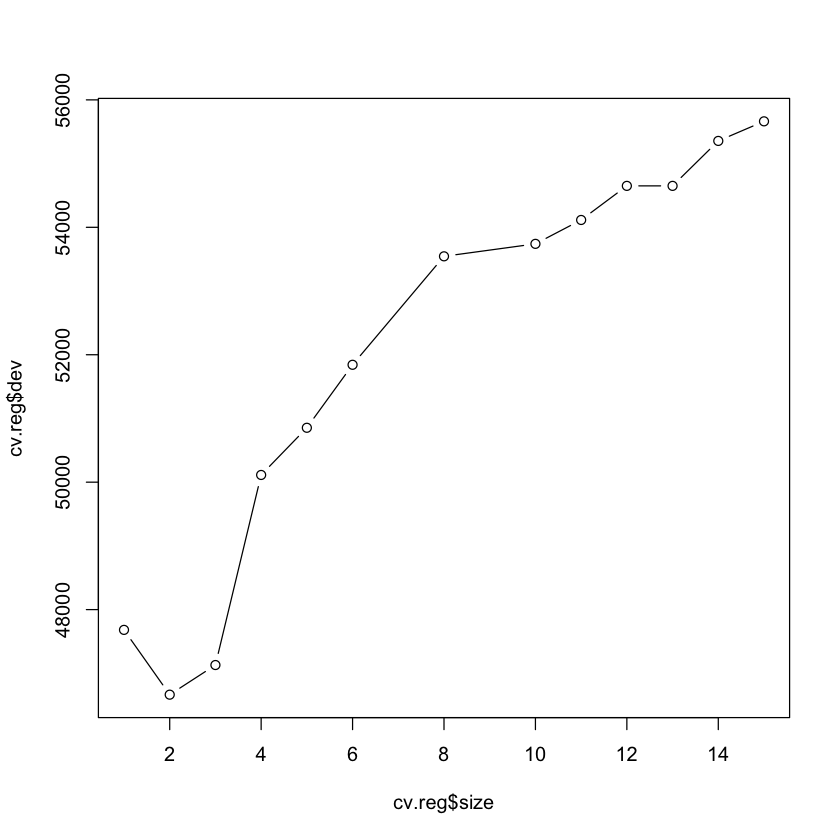

In [9]:
# plot tree size versus model deviance: 
cv.reg=cv.tree(tree.reg) 
plot(cv.reg$size, cv.reg$dev,type='b')

In [14]:
# determine the test accuracy on a hold out test set
prediction=predict(tree.reg,newdata=data[-train ,])
actual=data[-train, "Flanker_Unadj"]

mean((prediction-actual)^2)

[1] 113.817

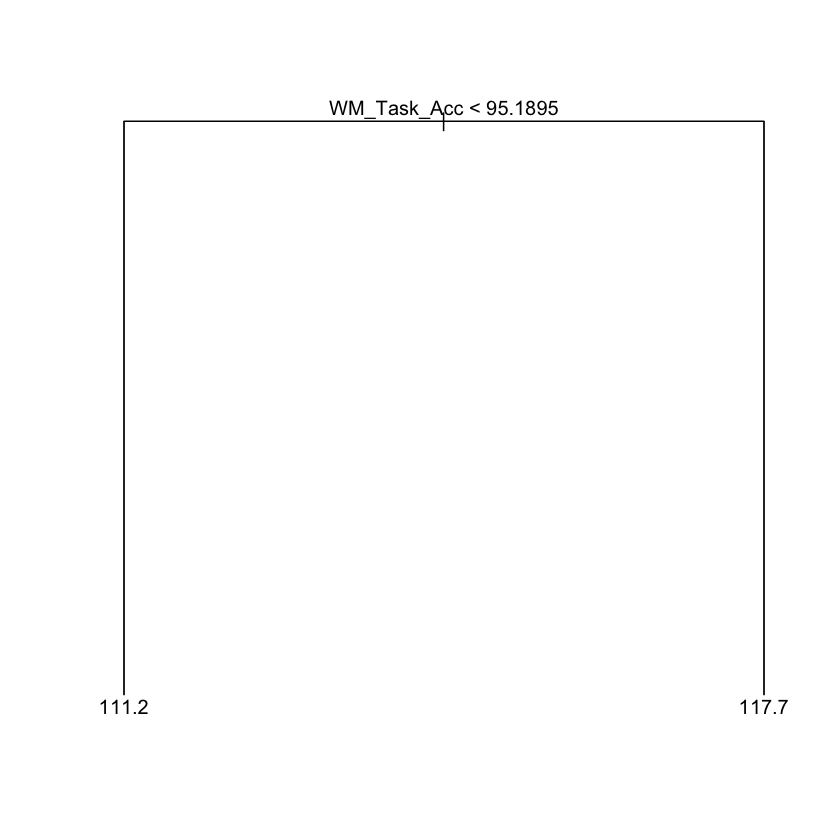

In [13]:
# prune the tree: according to the plot above, 2 nodes tree seem to have the least error
prune.tree.reg=prune.tree(tree.reg,best=2) #manually selecting a 5-node tree
plot(prune.tree.reg)
text(prune.tree.reg,pretty=0)

In [16]:
# the pruned model performance: 
prediction_pruned=predict(prune.tree.reg,newdata=data[-train ,])
actual=data[-train, "Flanker_Unadj"]

mean((prediction_pruned-actual)^2)

[1] 107.0594

Pruned model performance(107.06) is better than the unpruned model performance (113.82)

4. Use the same data table to fit a classification tree with gender as the response variable and all others as predictor variables. Prune your tree and find the best model fit using as few terminal nodes as possible, and show that your model fit improves after pruning. Evaluate your model using a hold out test sample.



Classification tree:
tree(formula = Gender ~ ., data = data, subset = train)
Variables actually used in tree construction:
[1] "FS_Total_GM_Vol"     "PosAffect_Unadj"     "Dexterity_Unadj"    
[4] "Flanker_Unadj"       "Language_Task_Acc"   "Relational_Task_Acc"
Number of terminal nodes:  14 
Residual mean deviance:  0.5706 = 284.7 / 499 
Misclassification error rate: 0.1306 = 67 / 513 

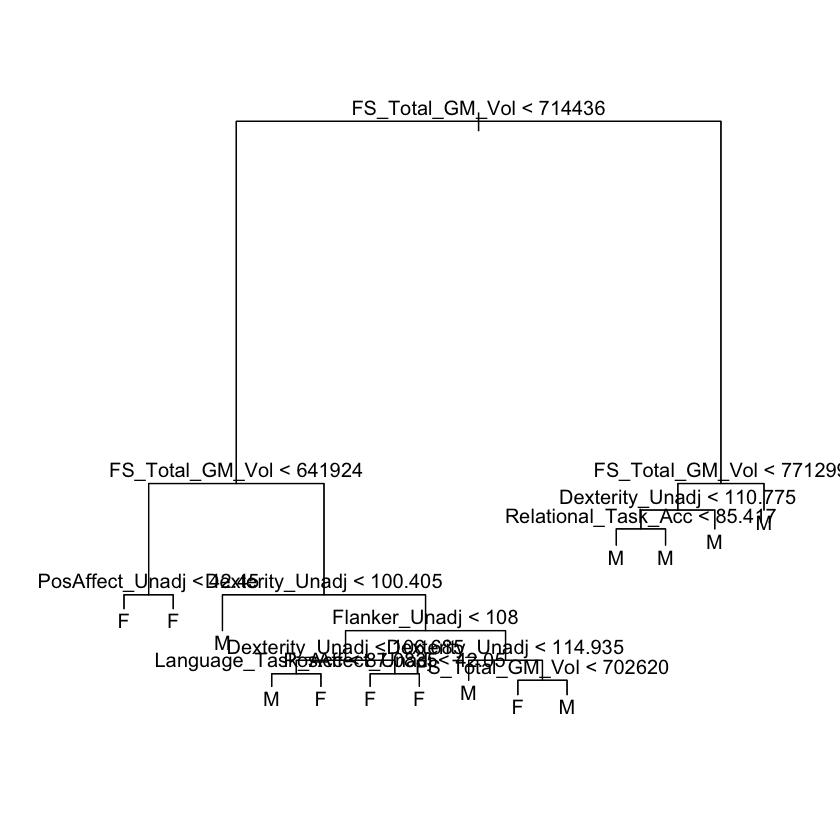

In [18]:
# -------------------------------
# Question 4
# -------------------------------
train = sample(1: nrow(data), nrow(data)/2) #create the training set
tree.classification=tree(Gender~.,data, subset=train) #fit the regression tree
summary(tree.classification) #summarize
plot(tree.classification)
text(tree.classification, pretty=0)

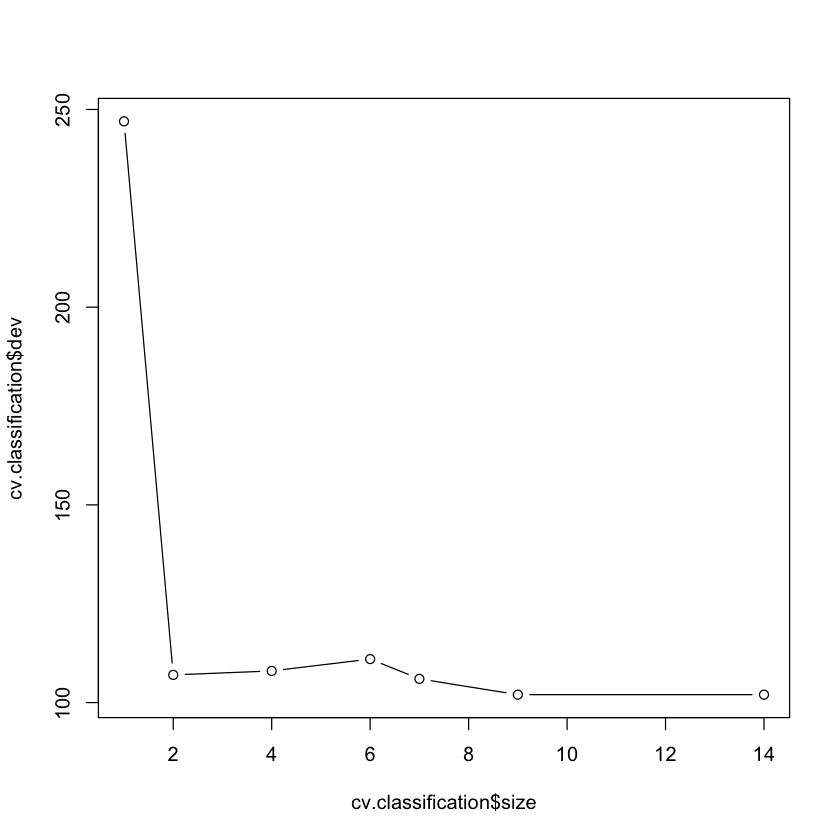

In [20]:
cv.classification = cv.tree(tree.classification,FUN=prune.misclass) 
plot(cv.classification$size, cv.classification$dev,type='b')

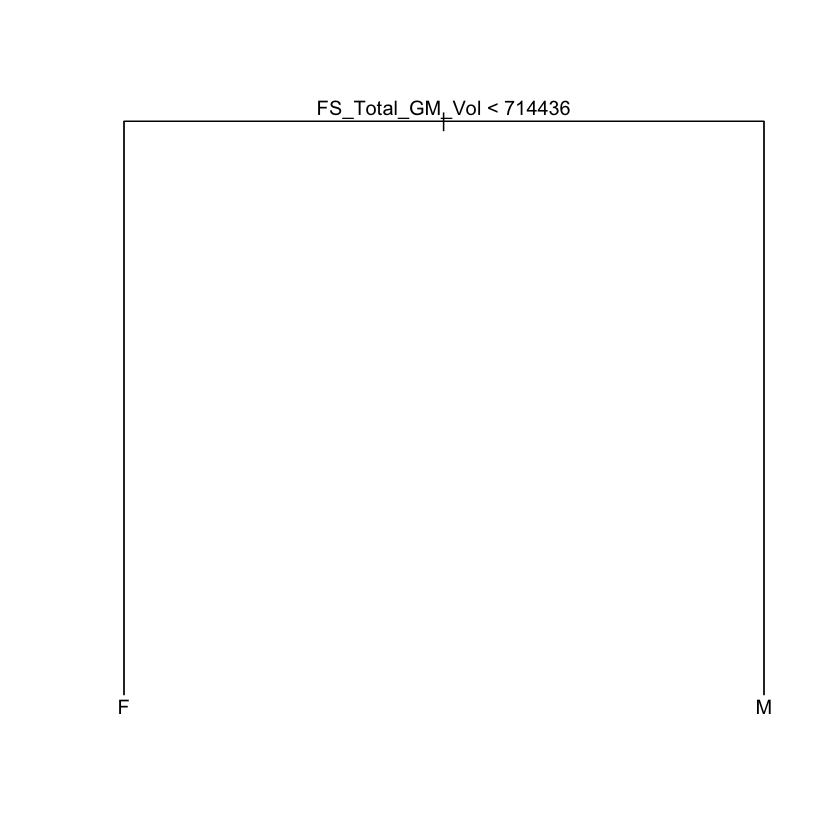

In [77]:
#actually prune the model: 
prune.tree.classification=prune.misclass(tree.classification, best=2) 
plot(prune.tree.classification)
text(prune.tree.classification,pretty=0)

In [78]:
# evaluate the performance, before pruned
test = data[-train,]
tree.classification.pred=predict(tree.classification, test, type="class") 
table(tree.classification.pred, test$Gender)
accuracy = (256+205) / nrow(test)
accuracy

                        
tree.classification.pred   F   M
                       F 256  63
                       M  79 205

[1] 0.7645108

In [79]:
# evaluate the performance, after prunning
pruned.tree.classification.pred=predict(prune.tree.classification, test, type="class") 
table(pruned.tree.classification.pred,test$Gender)
accuracy_pruned = (306+150) / nrow(test)
accuracy_pruned

                               
pruned.tree.classification.pred   F   M
                              F 306 118
                              M  29 150

[1] 0.7562189

5. Use the same data table to fit a random forest model for the classification task with m = 3 Check test accuracy and visualize feature importance for classfying gender.  

In [83]:
# -------------------------------
# Question 5
# -------------------------------

data_cleaned <- data  %>% na.omit()
train_cleaned = sample(1: nrow(data_cleaned), nrow(data_cleaned)/2) 
rf_Gender=randomForest(Gender~.,data=data_cleaned, subset=train_cleaned, mtry=3,
                       importance=TRUE)
rf_Gender


Call:
 randomForest(formula = Gender ~ ., data = data_cleaned, mtry = 3,      importance = TRUE, subset = train_cleaned) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 20.81%
Confusion matrix:
    F   M class.error
F 219  55   0.2007299
M  53 192   0.2163265

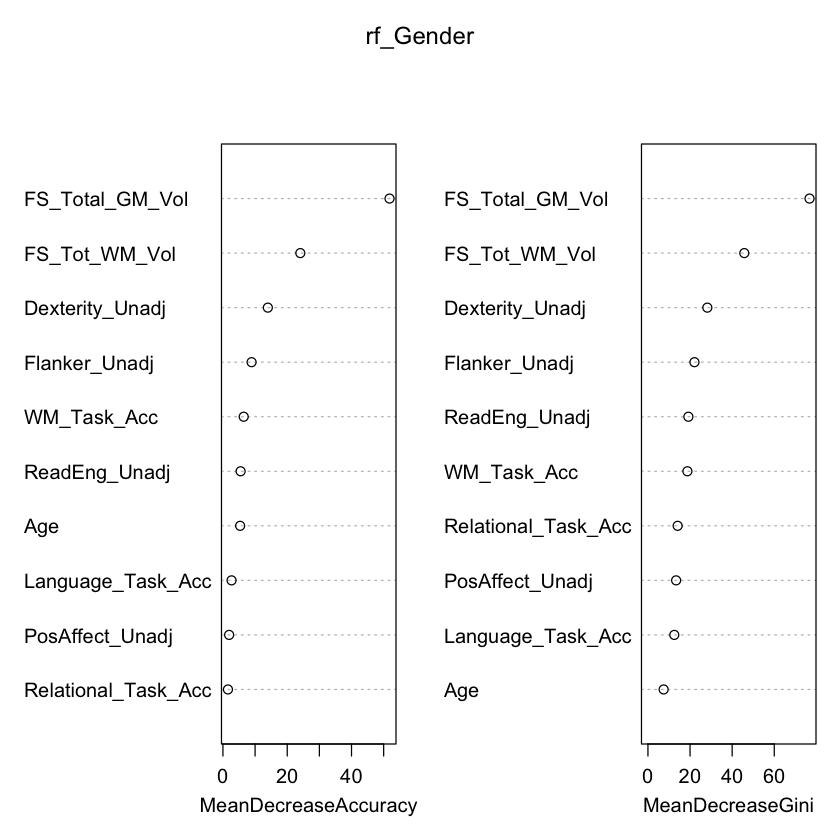

In [85]:
varImpPlot(rf_Gender)
